# New Section

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.layers import Input,Dense
from keras.models import Model

# Importing the Data

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()
#since this is a unsupervised learning, there is no target variable

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
#Normalizing the values(normalizing means the value ranges frm 0-1)
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
x_train[0][5] #range(0-1) therefore,values has been normalised 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [10]:
x_train=x_train.reshape(len(x_train),28*28)
x_test=x_test.reshape(len(x_test),28*28)

In [11]:
x_train.shape

(60000, 784)

Text(0.5, 0.98, 'TRAIN DATA')

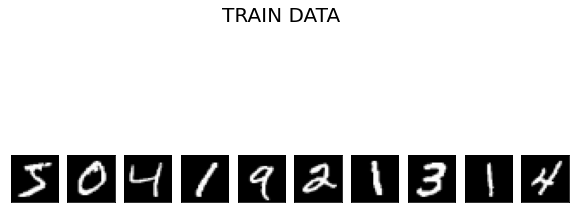

In [12]:
plt.figure(figsize=(10,5))
for i in range(10):
  ax=plt.subplot(1,10,i+1) #1 row 10 cols 
  plt.imshow(x_train[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.suptitle('TRAIN DATA',fontsize=20)  

In [13]:
def show_visual(data,title,n=10,height=28,width=28):
  plt.figure(figsize=(10,5))
  for i in range(n):
    ax=plt.subplot(1,n,i+1) #1 row 10 cols 
    plt.imshow(data[i].reshape(height,width))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.suptitle(title,fontsize=20)   

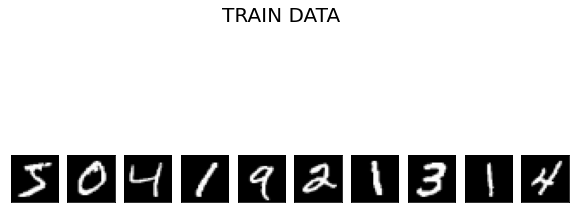

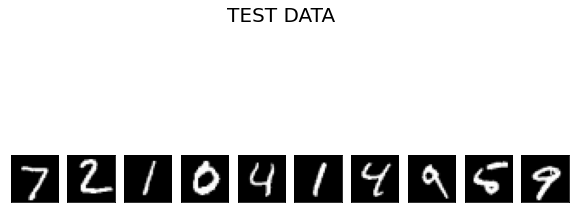

In [14]:
show_visual(x_train,title='TRAIN DATA')
show_visual(x_test,title='TEST DATA')

In [15]:
input_dim,output_dim=784,784
encode_dim=100
hidden_dim=256

In [16]:
#ENCODER
input_layer=Input(shape=input_dim,name="INPUT")
hidden_layer_1=Dense(hidden_dim,activation='relu',name='HIDDEN_1')(input_layer)


In [17]:
#Bottle Neck
bottle_neck=Dense(encode_dim,activation='relu',name='BOTTLE_NECK')(hidden_layer_1)


In [26]:
#DECODER
hidden_layer_2=Dense(hidden_dim,activation='relu',name='HIDDEN_2')(bottle_neck)
output_layer=Dense(output_dim,activation='sigmoid',name="OUTPUT")(hidden_layer_2)

In [27]:
model = Model(input_layer, output_layer)

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [29]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT (InputLayer)          [(None, 784)]             0         
                                                                 
 HIDDEN_1 (Dense)            (None, 256)               200960    
                                                                 
 BOTTLE_NECK (Dense)         (None, 100)               25700     
                                                                 
 HIDDEN_2 (Dense)            (None, 256)               25856     
                                                                 
 OUTPUT (Dense)              (None, 784)               201488    
                                                                 
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,x_train,epochs=10) #since audoencodes are unsupervised,there is no y_train

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1116
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0803
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0757
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0736
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0722
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0713
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0706
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0702
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0698
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0695


In [31]:
decoded_data=model.predict(x_test)

In [34]:
get_encoded_data=Model(inputs=model.input,
                       outputs=model.get_layer('BOTTLE_NECK').output)

In [35]:
encoded_data=get_encoded_data.predict(x_test)

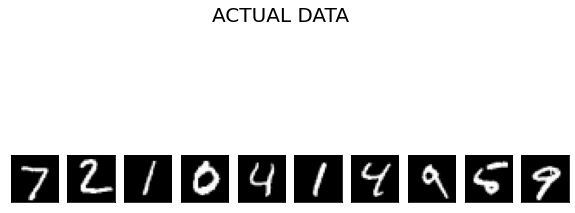

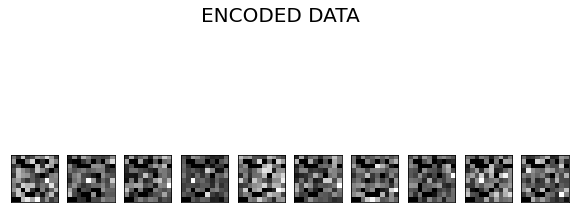

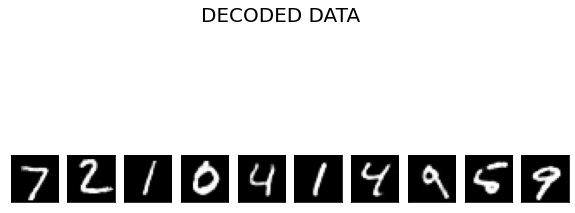

In [36]:
show_visual(x_test,title='ACTUAL DATA')
show_visual(encoded_data,title='ENCODED DATA',height=10,width=10) #since encode_dim=100
show_visual(decoded_data,title='DECODED DATA')
  